# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
api_key = "dc750f8d153d08e67500c65de8aa6fda"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [44]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [82]:
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
weather_data = []
index_counter = 0
set_counter = 1 

In [83]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="



In [113]:
print("Beginning Data Retrieval ")
print("-----------------------------")

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city = response["name"]
        cloudiness = response["clouds"]["all"]
        country = response["sys"]["country"]
        date = response["dt"]
        humidity = response["main"]["humidity"]
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        max_temp = response['main']['temp_max']
        wind_speed = response["wind"]["speed"]
        weather_data.append({"City": city, "Country": country, "Latitude": lat, "Longitude": lng,
                            "Temperature": max_temp, "Humidity (%)": humidity, "Cloudiness (%)":cloudiness,
                            "Wind Speed (MPH)": wind_speed, "Date": date})
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 16 of Set 44 : Lowestoft
Processing Record 17 of Set 44 : Mehamn
Processing Record 18 of Set 44 : Chokurdakh
Processing Record 19 of Set 44 : Mataura
Processing Record 20 of Set 44 : Muisne
Processing Record 21 of Set 44 : Qaanaaq
Processing Record 22 of Set 44 : Mahébourg
Processing Record 23 of Set 44 : Rikitea
Processing Record 24 of Set 44 : São Marcos
Processing Record 25 of Set 44 : Punta Arenas
Processing Record 26 of Set 44 : Prince Albert
Processing Record 27 of Set 44 : Naze
Processing Record 28 of Set 44 : Cherskiy
Processing Record 29 of Set 44 : Busselton
Processing Record 30 of Set 44 : Guerrero Negro
City not found
Processing Record 31 of Set 44 : Lagoa
Processing Record 32 of Set 44 : Saint-Augustin
Processing Record 33 of Set 44 : Tūkrah
Processing Record 34 of Set 44 : Alexandria
Processing Record 35 of Set 44 : Tasiilaq
Processing Record 36 of Set 44 : Saint-Philippe
Processing Record 37 of Set

Processing Record 49 of Set 47 : Chiredzi
Processing Record 50 of Set 47 : Umba
Processing Record 0 of Set 48 : Darnah
Processing Record 1 of Set 48 : Trhové Sviny
Processing Record 2 of Set 48 : Mufumbwe
City not found
Processing Record 3 of Set 48 : Bluff
Processing Record 4 of Set 48 : Port Shepstone
Processing Record 5 of Set 48 : Road Town
City not found
Processing Record 6 of Set 48 : Gusinoye Ozero
Processing Record 7 of Set 48 : Mount Holly
Processing Record 8 of Set 48 : Port Hawkesbury
Processing Record 9 of Set 48 : Plettenberg Bay
Processing Record 10 of Set 48 : La Asuncion
Processing Record 11 of Set 48 : Bilibino
Processing Record 12 of Set 48 : Lokosovo
Processing Record 13 of Set 48 : Tarauacá
Processing Record 14 of Set 48 : Leningradskiy
Processing Record 15 of Set 48 : Kruisfontein
Processing Record 16 of Set 48 : Matanzas
Processing Record 17 of Set 48 : The Valley
Processing Record 18 of Set 48 : Dolores
Processing Record 19 of Set 48 : Kotka
Processing Record 20 

Processing Record 33 of Set 51 : Hervey Bay
Processing Record 34 of Set 51 : Cockburn Town
City not found
Processing Record 35 of Set 51 : Salalah
Processing Record 36 of Set 51 : Hambantota
Processing Record 37 of Set 51 : Álamo
Processing Record 38 of Set 51 : São João da Barra
Processing Record 39 of Set 51 : Nacala
Processing Record 40 of Set 51 : Upington
Processing Record 41 of Set 51 : Camacha
Processing Record 42 of Set 51 : Boca do Acre
Processing Record 43 of Set 51 : Rawson
Processing Record 44 of Set 51 : Batagay
Processing Record 45 of Set 51 : Srandakan
Processing Record 46 of Set 51 : Ampanihy
Processing Record 47 of Set 51 : Port Moresby
Processing Record 48 of Set 51 : Mafinga
Processing Record 49 of Set 51 : Karema
Processing Record 50 of Set 51 : Port Hardy
Processing Record 0 of Set 52 : Mahabalipuram
Processing Record 1 of Set 52 : Karauli
Processing Record 2 of Set 52 : Luangwa
Processing Record 3 of Set 52 : San Cristobal
Processing Record 4 of Set 52 : Shimoda
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [114]:
weather_df=pd.DataFrame(weather_data)
weather_df=weather_df[["City","Cloudiness (%)","Country","Date","Humidity (%)","Latitude","Longitude","Temperature", "Wind Speed (MPH)"]]
weather_df.head()


,City,Cloudiness (%),Country,Date,Humidity (%),Latitude,Longitude,Temperature,Wind Speed (MPH)
0,Lowestoft,0.0,GB,NaN,81.0,52.4752,NaN,NaN,4.00
1,Mehamn,95.0,NO,NaN,91.0,71.0357,NaN,NaN,10.00
2,Chokurdakh,78.0,RU,NaN,79.0,70.6333,NaN,NaN,4.03
3,Mataura,0.0,NZ,NaN,68.0,-46.1927,NaN,NaN,8.99
4,Muisne,45.0,EC,NaN,85.0,0.6000,NaN,NaN,2.13


In [115]:
weather_df.to_csv("weather_data.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

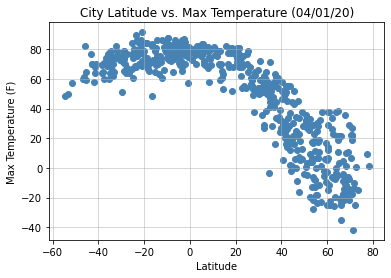

In [107]:
plt.scatter(weather_df["Latitude"], weather_df["Temperature"], facecolor = "steelblue")

plt.title("City Latitude vs. Max Temperature (04/01/20)")

plt.xlabel("Latitude")

plt.ylabel("Max Temperature (F)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Lat vs Max Temp.png")

## Latitude vs. Humidity Plot

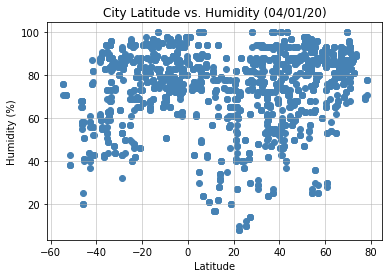

In [116]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], facecolor = "steelblue")

plt.title("City Latitude vs. Humidity (04/01/20)")

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("City Lat vs Humidity.png")

## Latitude vs. Cloudiness Plot

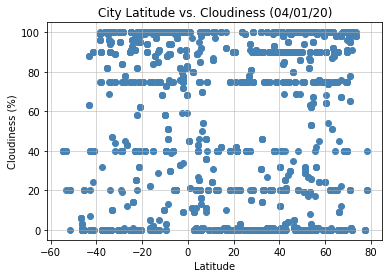

In [118]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"], facecolor = "steelblue")

plt.title("City Latitude vs. Cloudiness (04/01/20)")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

plt.ylim(-5,105)

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("City Lat vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

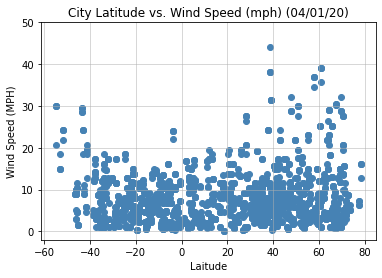

In [120]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (MPH)"], facecolor = "steelblue")
plt.title("City Latitude vs. Wind Speed (mph) (04/01/20)")

plt.xlabel("Laitude")

plt.ylabel("Wind Speed (MPH)")

plt.ylim(-2,50)

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("City Lat vs Wind Speed (mph).png")

## Linear Regression

In [121]:
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [124]:
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],3)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [130]:
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Temperature"])

annotate(equation, 0, 0)

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Max Temp (F)")

plt.savefig("Northern Hemisphere - Max Temp vs. Lat Lin Regression.png")

KeyError: 'Temperature'

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


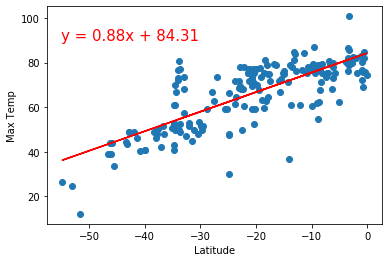

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


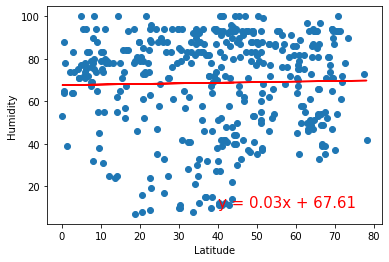

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


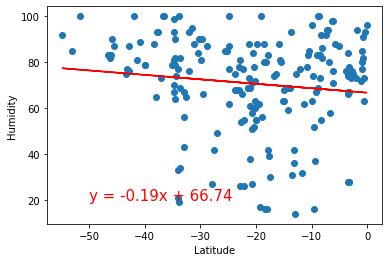

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


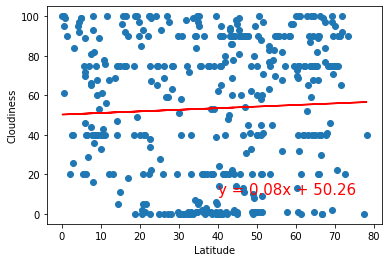

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


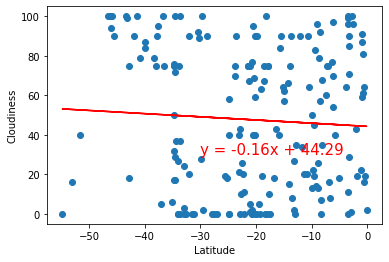

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


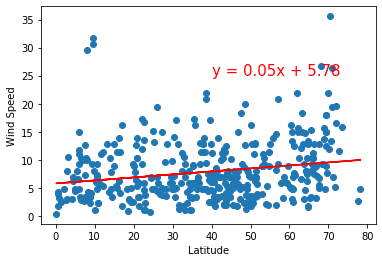

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


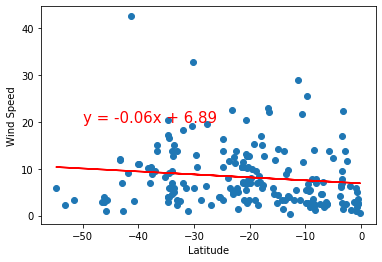